In [1]:
!conda install seaborn==0.9.0 -y

Solving environment: done

# All requested packages already installed.



In [2]:
import pandas as pd

In [4]:
uri_filmes = 'https://raw.githubusercontent.com/alura-cursos/machine-learning-algoritmos-nao-supervisionados/master/movies.csv' 
filmes = pd.read_csv(uri_filmes) 
filmes.columns = ['filme_id', 'titulo', 'generos'] 
filmes.head()

,filme_id,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
generos = filmes.generos.str.get_dummies()
dados_dos_filmes = pd.concat([filmes, generos], axis=1)
dados_dos_filmes.head()

,filme_id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
scaler = StandardScaler()
generos_escalados = scaler.fit_transform(generos)
generos_escalados

/home/r2d2/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/r2d2/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


array([[-0.05917995, -0.48060698,  2.59101927, ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698,  2.59101927, ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       ...,
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995,  2.0807022 , -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534]])

In [8]:
from sklearn.cluster import KMeans

In [9]:
modelo = KMeans(n_clusters=3)
modelo.fit(generos_escalados)
print(f'Grupos: {modelo.labels_}')

Grupos: [2 2 1 ... 1 2 1]


In [10]:
print(generos.columns)
print(modelo.cluster_centers_)

Index(['(no genres listed)', 'Action', 'Adventure', 'Animation', 'Children',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir',
       'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller',
       'War', 'Western'],
      dtype='object')
[[-0.05917995  0.24636526 -0.29506747 -0.23996249 -0.26390341 -0.54886879
   0.56215258 -0.21550288 -0.07558211 -0.13510824  0.27342298  0.92888481
  -0.06307747 -0.17481563  0.61443229 -0.33451531  0.16891157  1.30067459
  -0.12762982 -0.05896562]
 [ 0.04077342 -0.29232766 -0.31472424 -0.23937251 -0.17826871  0.24939724
  -0.15457005  0.14733994  0.19174687 -0.18806577 -0.08939712 -0.32309406
  -0.11604433  0.02977187 -0.21535398  0.21736849 -0.23817946 -0.47767849
   0.06951593  0.03355625]
 [-0.05917995  0.70255262  1.63262771  1.26604497  1.07610051 -0.06971958
  -0.30393407 -0.211276   -0.59534509  0.91113917 -0.09492563 -0.25032919
   0.53047968  0.16259933 -0.15949814 -0.28575248  0.622179   -0.25650689
 

In [11]:
grupos = pd.DataFrame(modelo.cluster_centers_, columns=generos.columns)

grupos

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,-0.059180,0.246365,-0.295067,-0.239962,-0.263903,-0.548869,0.562153,-0.215503,-0.075582,-0.135108,0.273423,0.928885,-0.063077,-0.174816,0.614432,-0.334515,0.168912,1.300675,-0.127630,-0.058966
1,0.040773,-0.292328,-0.314724,-0.239373,-0.178269,0.249397,-0.154570,0.147340,0.191747,-0.188066,-0.089397,-0.323094,-0.116044,0.029772,-0.215354,0.217368,-0.238179,-0.477678,0.069516,0.033556
2,-0.059180,0.702553,1.632628,1.266045,1.076101,-0.069720,-0.303934,-0.211276,-0.595345,0.911139,-0.094926,-0.250329,0.530480,0.162599,-0.159498,-0.285752,0.622179,-0.256507,-0.059092,-0.032658


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f9dc7a7ab00>,
      dtype=object)

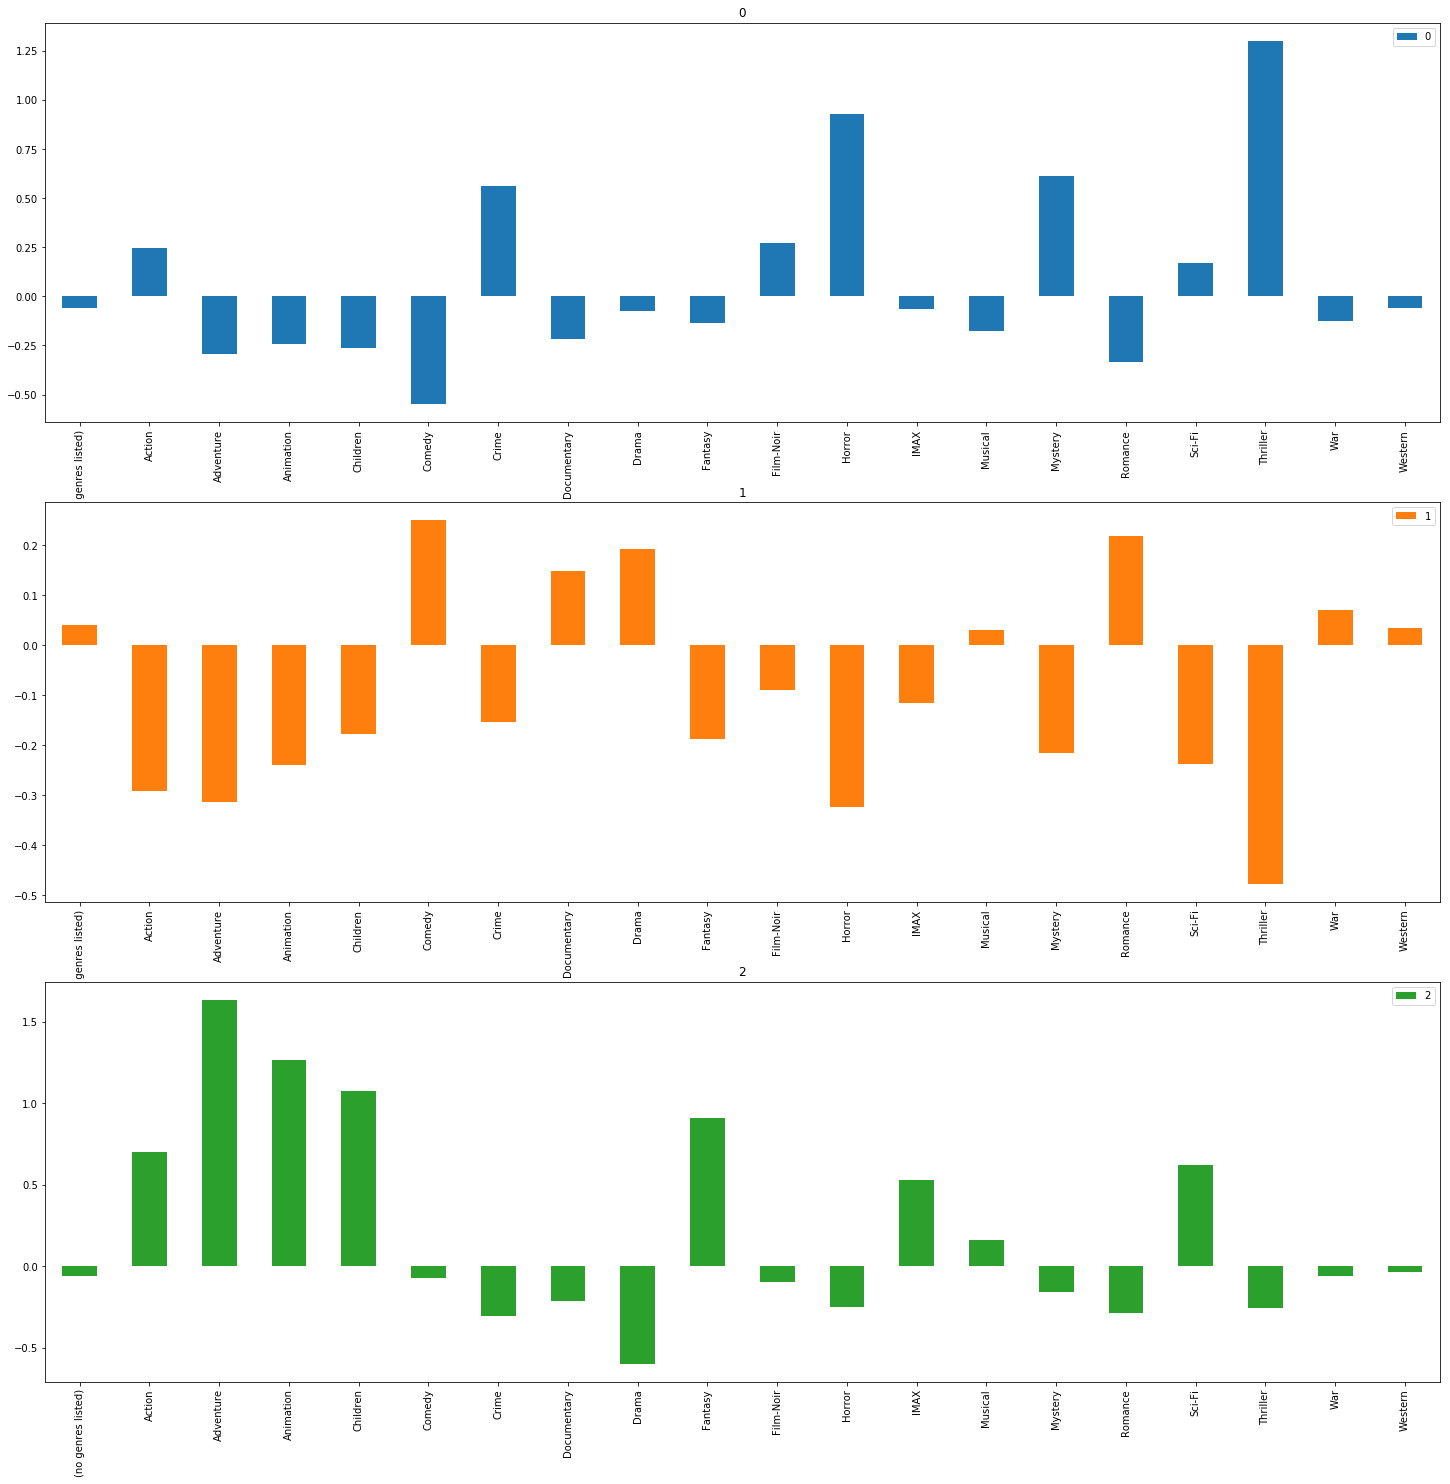

In [13]:
grupos.transpose().plot.bar(subplots=True, figsize=(25, 25), sharex=False)

In [14]:
grupo = 0
filtro = modelo.labels_ == grupo
dados_dos_filmes[filtro].sample(10)

,filme_id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
1031,1343,Cape Fear (1991),Thriller,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3416,4645,Cure (1997),Crime|Horror|Thriller,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0
7686,89427,Shark Night 3D (2011),Horror|Thriller,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
3258,4404,Faust (1926),Drama|Fantasy|Horror,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1224,1625,"Game, The (1997)",Drama|Mystery|Thriller,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
6593,55290,Gone Baby Gone (2007),Crime|Drama|Mystery,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
7088,70206,"Collector, The (2009)",Crime|Horror|Thriller,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0
308,350,"Client, The (1994)",Drama|Mystery|Thriller,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
9724,190183,The Darkest Minds (2018),Sci-Fi|Thriller,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
9063,142366,Cigarette Burns (2005),Horror|Thriller,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0


In [15]:
from sklearn.manifold import TSNE

In [16]:
tsne = TSNE()
visualizacao = tsne.fit_transform(generos_escalados)
visualizacao

array([[  2.092333  ,  60.678005  ],
       [ 25.797956  ,  49.94067   ],
       [ 27.120968  , -26.397821  ],
       ...,
       [ -8.6771965 ,  15.493474  ],
       [  9.742631  ,  36.01196   ],
       [ 28.073908  ,  -0.48090425]], dtype=float32)

In [17]:
import seaborn as sns

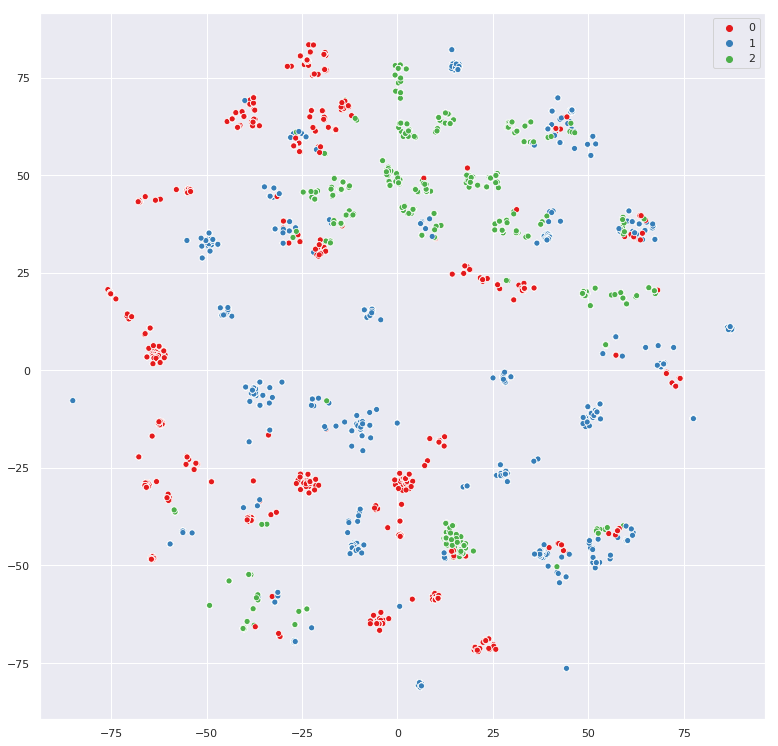

In [18]:
sns.set(rc={'figure.figsize': (13,13)})

sns.scatterplot(x=visualizacao[:, 0], 
                y=visualizacao[:, 1], 
                hue=modelo.labels_, 
                palette=sns.color_palette('Set1', 3))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f9dbe84eeb8>,
      dtype=object)

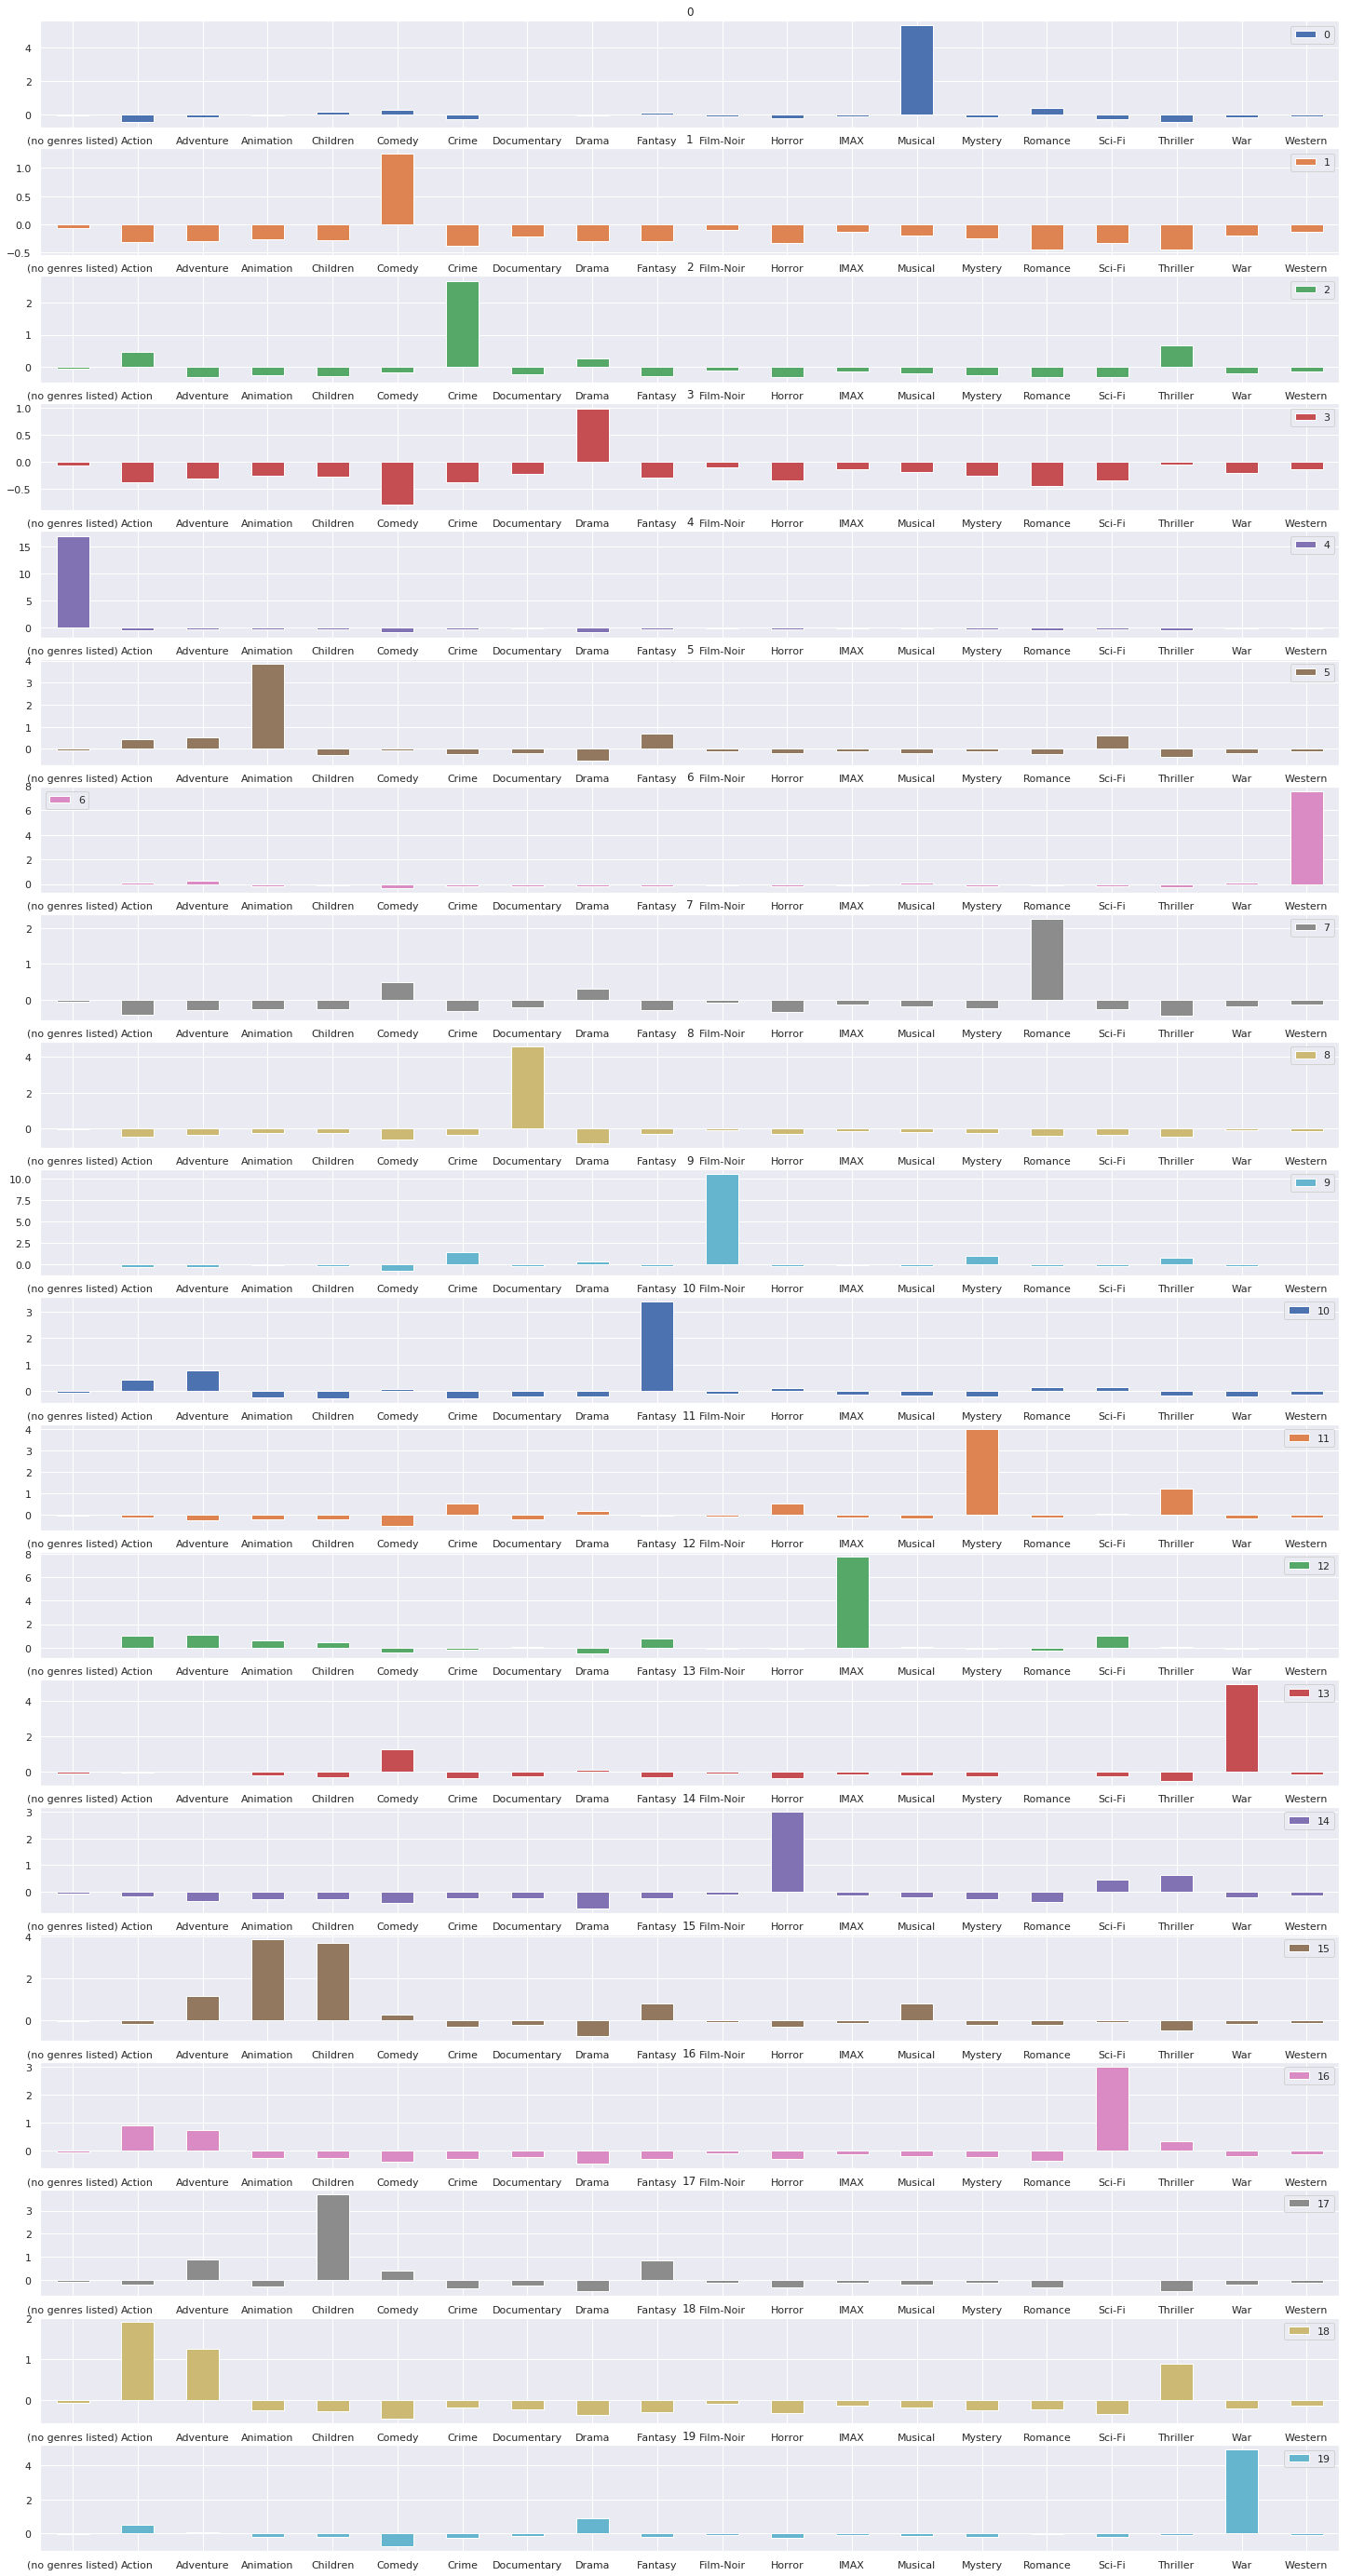

In [21]:
modelo = KMeans(n_clusters=20)
modelo.fit(generos_escalados)
grupos = pd.DataFrame(modelo.cluster_centers_,
            columns=generos.columns)

grupos.transpose().plot.bar(subplots=True, figsize=(25, 50), sharex=False, rot=0)

In [26]:
def kmeans(numero_de_clusters, generos):
    modelo = KMeans(n_clusters=numero_de_clusters)
    modelo.fit(generos)
    return [numero_de_clusters, modelo.inertia_]

In [27]:
kmeans(20, generos_escalados)

[20, 55482.474290962055]

In [29]:
kmeans(3, generos_escalados)

[3, 166185.13055171815]

In [30]:
resultado = [kmeans(numero_de_grupos, generos_escalados) for numero_de_grupos in range(1, 41)]
resultado

[[1, 194840.0],
 [2, 179565.7551429154],
 [3, 167861.95945201605],
 [4, 157431.72311307618],
 [5, 148138.31051797364],
 [6, 137964.33060471324],
 [7, 128620.6014593285],
 [8, 118744.99474188426],
 [9, 111725.66750561903],
 [10, 101255.16940739525],
 [11, 93019.98642008506],
 [12, 87220.37440420178],
 [13, 79918.1325998578],
 [14, 73480.74638224932],
 [15, 66854.58723877587],
 [16, 63554.83966479295],
 [17, 61999.96039991308],
 [18, 58784.76101274673],
 [19, 56827.91328816611],
 [20, 55655.10731510165],
 [21, 53095.56476005451],
 [22, 52301.77072882159],
 [23, 49676.970424892286],
 [24, 49488.081999715774],
 [25, 47565.01015321853],
 [26, 46970.51887270364],
 [27, 45426.74921028045],
 [28, 44291.536359173515],
 [29, 43429.22927666068],
 [30, 43257.15316834383],
 [31, 41803.860640987514],
 [32, 40612.881372516975],
 [33, 40101.011333937015],
 [34, 38735.498498416404],
 [35, 38575.88527083006],
 [36, 38093.536299812746],
 [37, 37288.04145208666],
 [38, 37019.33750964263],
 [39, 35805.8629

In [31]:
resultado = pd.DataFrame(resultado, columns=['grupos', 'inertia'])
resultado

,grupos,inertia
0,1,194840.000000
1,2,179565.755143
2,3,167861.959452
3,4,157431.723113
4,5,148138.310518
5,6,137964.330605
6,7,128620.601459
7,8,118744.994742
8,9,111725.667506
9,10,101255.169407


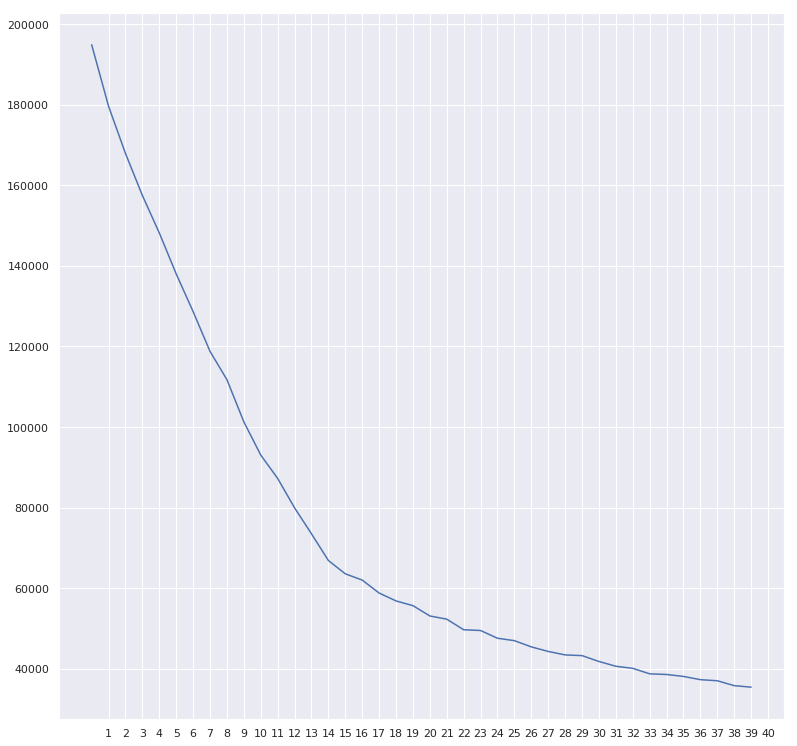

In [32]:
resultado.inertia.plot(xticks=resultado.grupos)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f9dbacdcc88>,
      dtype=object)

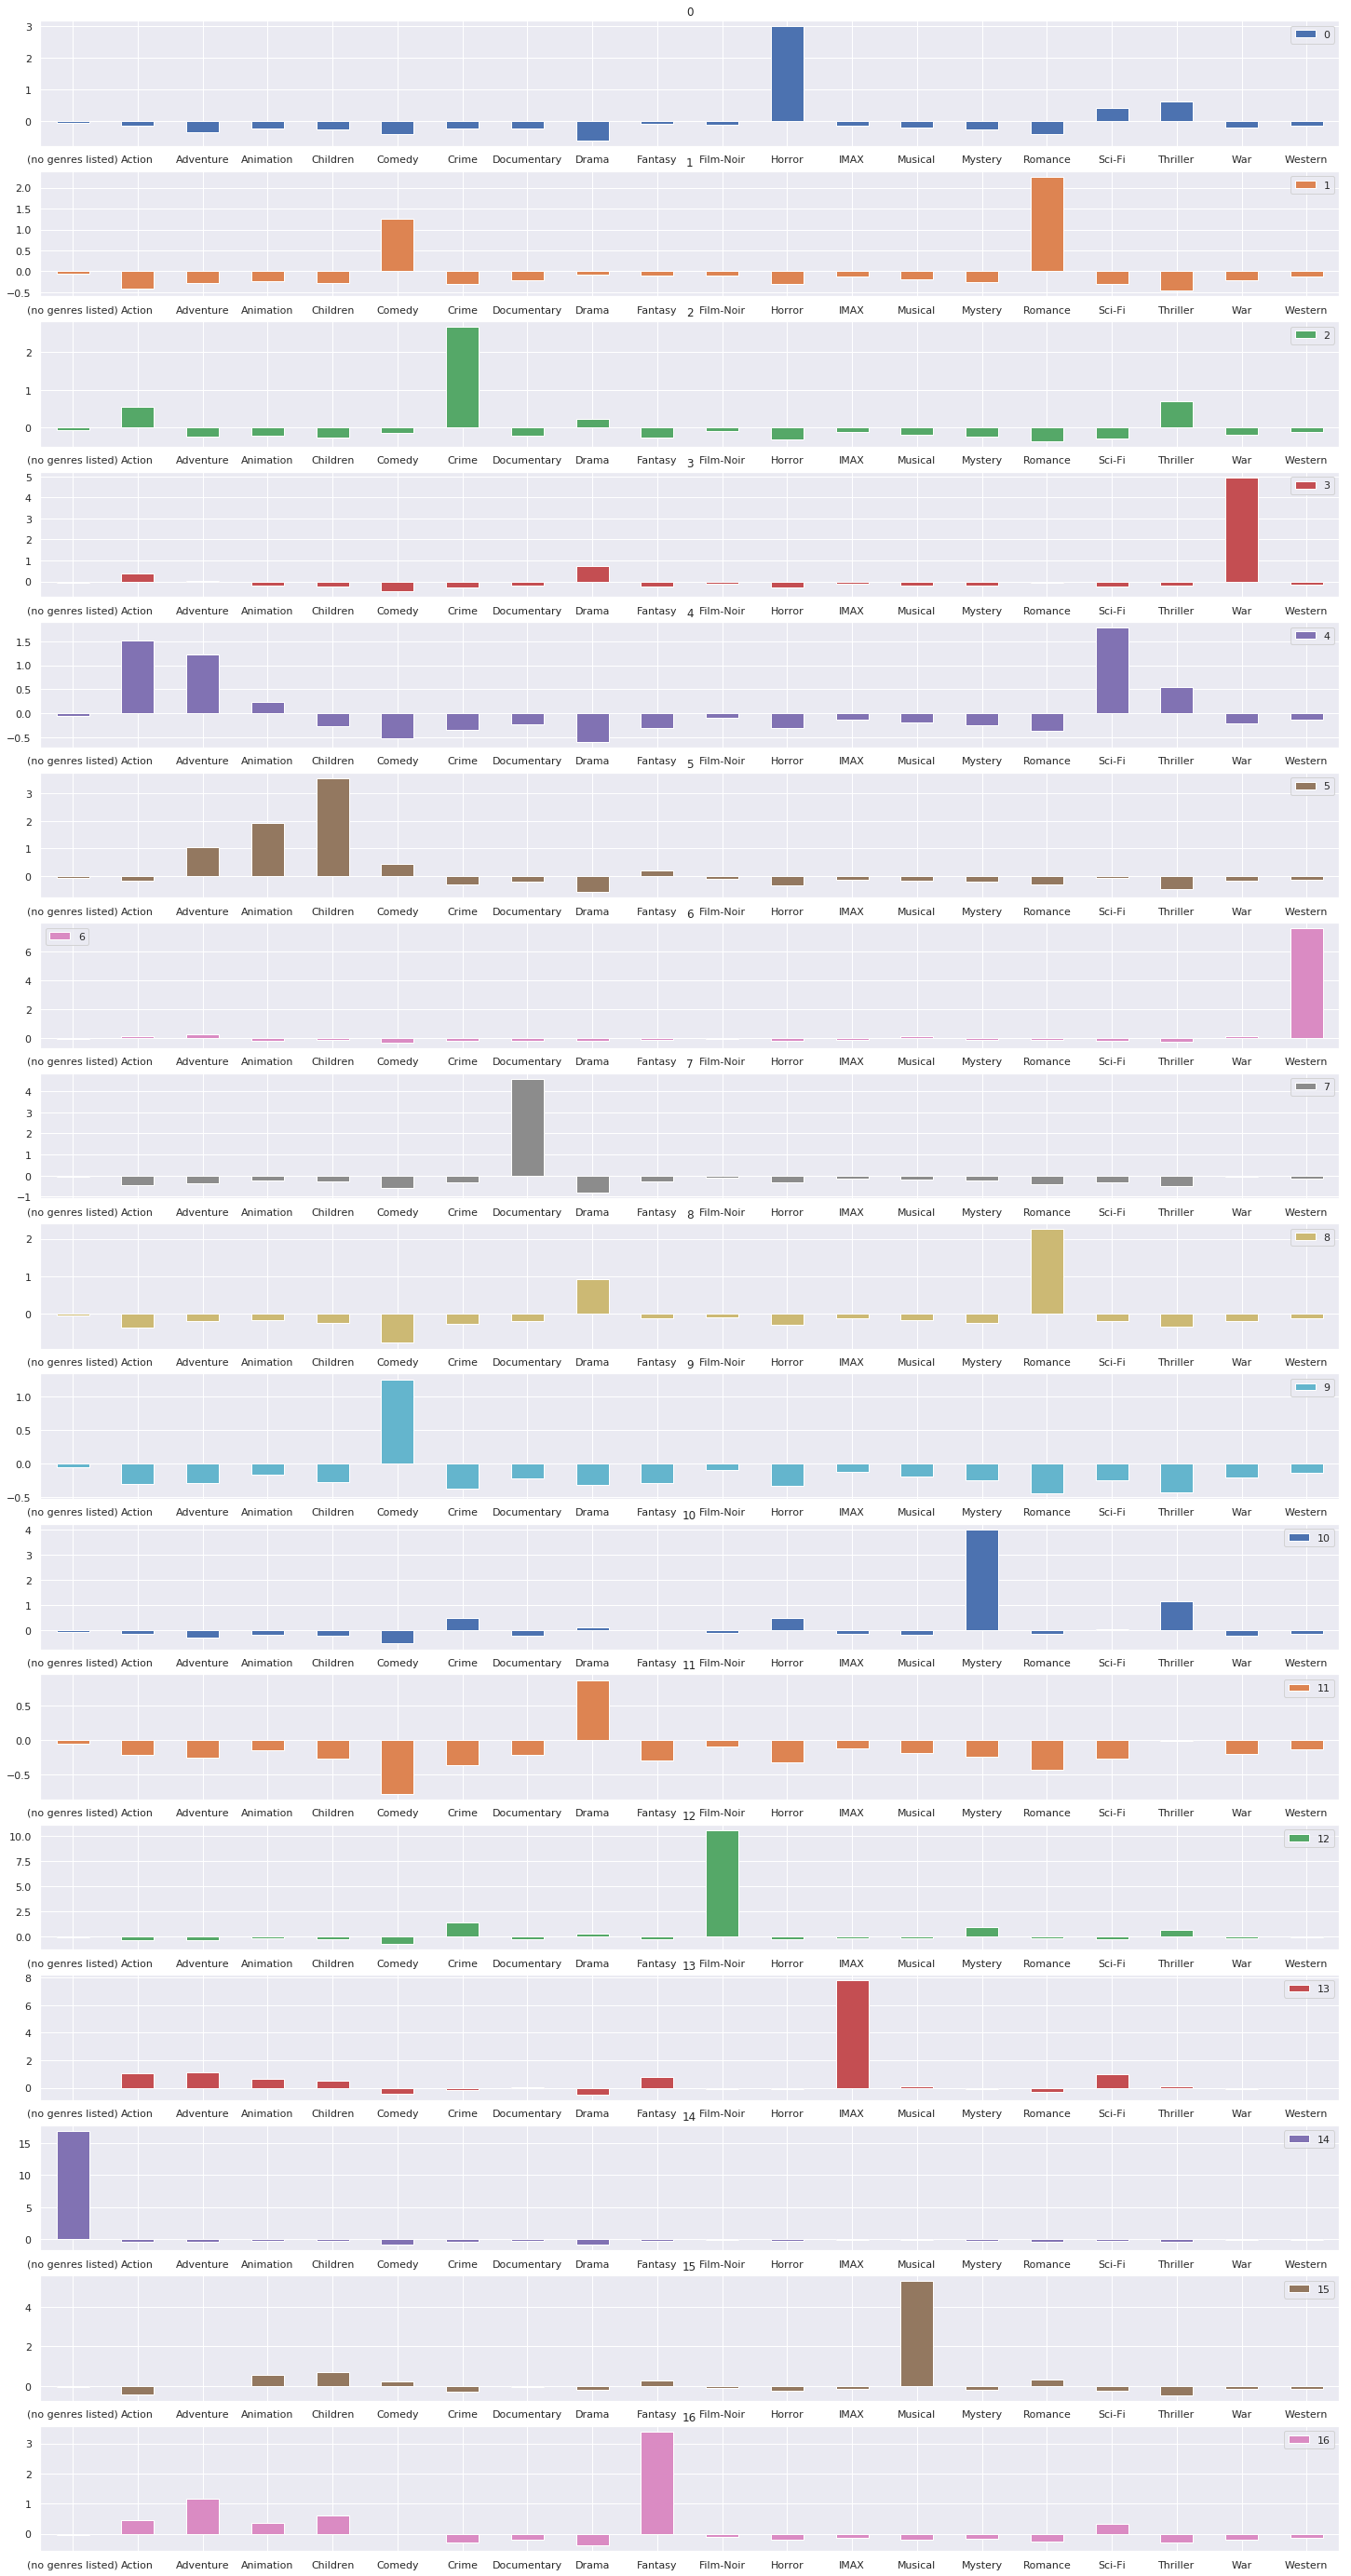

In [35]:
modelo = KMeans(n_clusters=17)
modelo.fit(generos_escalados)

grupos = pd.DataFrame(modelo.cluster_centers_,
            columns=generos.columns)

grupos.transpose().plot.bar(subplots=True, figsize=(25, 50), sharex=False, rot=0)

In [41]:
grupo = 16
filtro = modelo.labels_ == grupo
dados_dos_filmes[filtro].sample(5)

,filme_id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
9145,147372,Doctor Who: Last Christmas (2014),Adventure|Drama|Fantasy|Sci-Fi,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
6014,37857,MirrorMask (2005),Adventure|Children|Drama|Fantasy,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1480,2005,"Goonies, The (1985)",Action|Adventure|Children|Comedy|Fantasy,0,1,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
6912,64167,Dinotopia (2002),Adventure|Fantasy,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6957,65685,Inkheart (2008),Adventure|Fantasy,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
from sklearn.cluster import AgglomerativeClustering

In [44]:
modelo = AgglomerativeClustering(n_clusters=17)
grupos = modelo.fit_predict(generos_escalados)
grupos

array([ 5, 14, 13, ...,  2,  5,  3])

In [45]:
tsne = TSNE()
visualizacao = tsne.fit_transform(generos_escalados)
visualizacao

array([[ 26.092474,  29.356998],
       [ 27.892805,  42.73783 ],
       [-33.4977  ,  -9.779675],
       ...,
       [ 12.019056, -32.93285 ],
       [-17.993124,  48.58867 ],
       [ -9.911077,   8.083061]], dtype=float32)

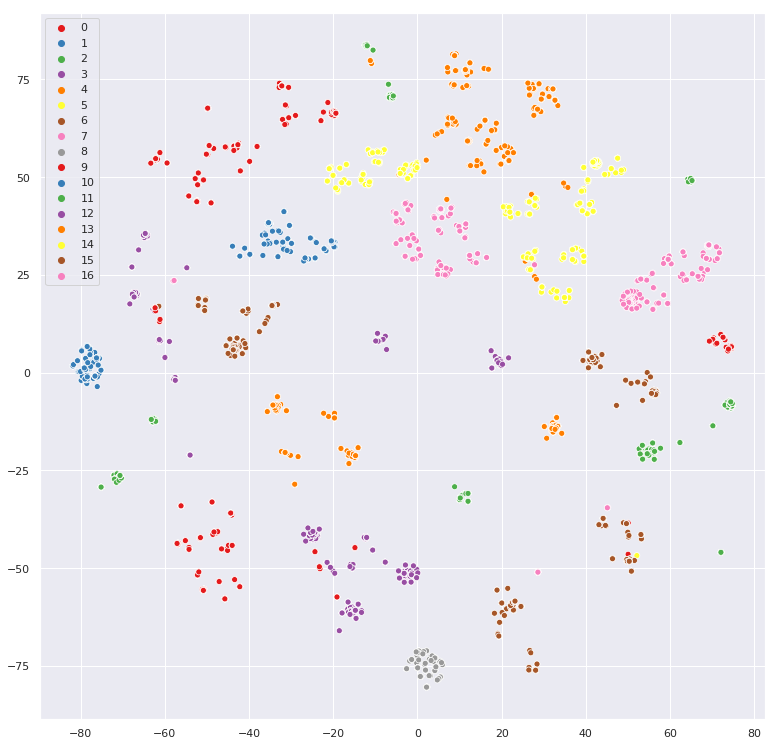

In [46]:
sns.scatterplot(x=visualizacao[:, 0], 
                y=visualizacao[:, 1], 
                hue=grupos, palette=sns.color_palette('Set1', 17))

In [47]:
from scipy.cluster.hierarchy import dendrogram, linkage

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f9dba106780>,
      dtype=object)

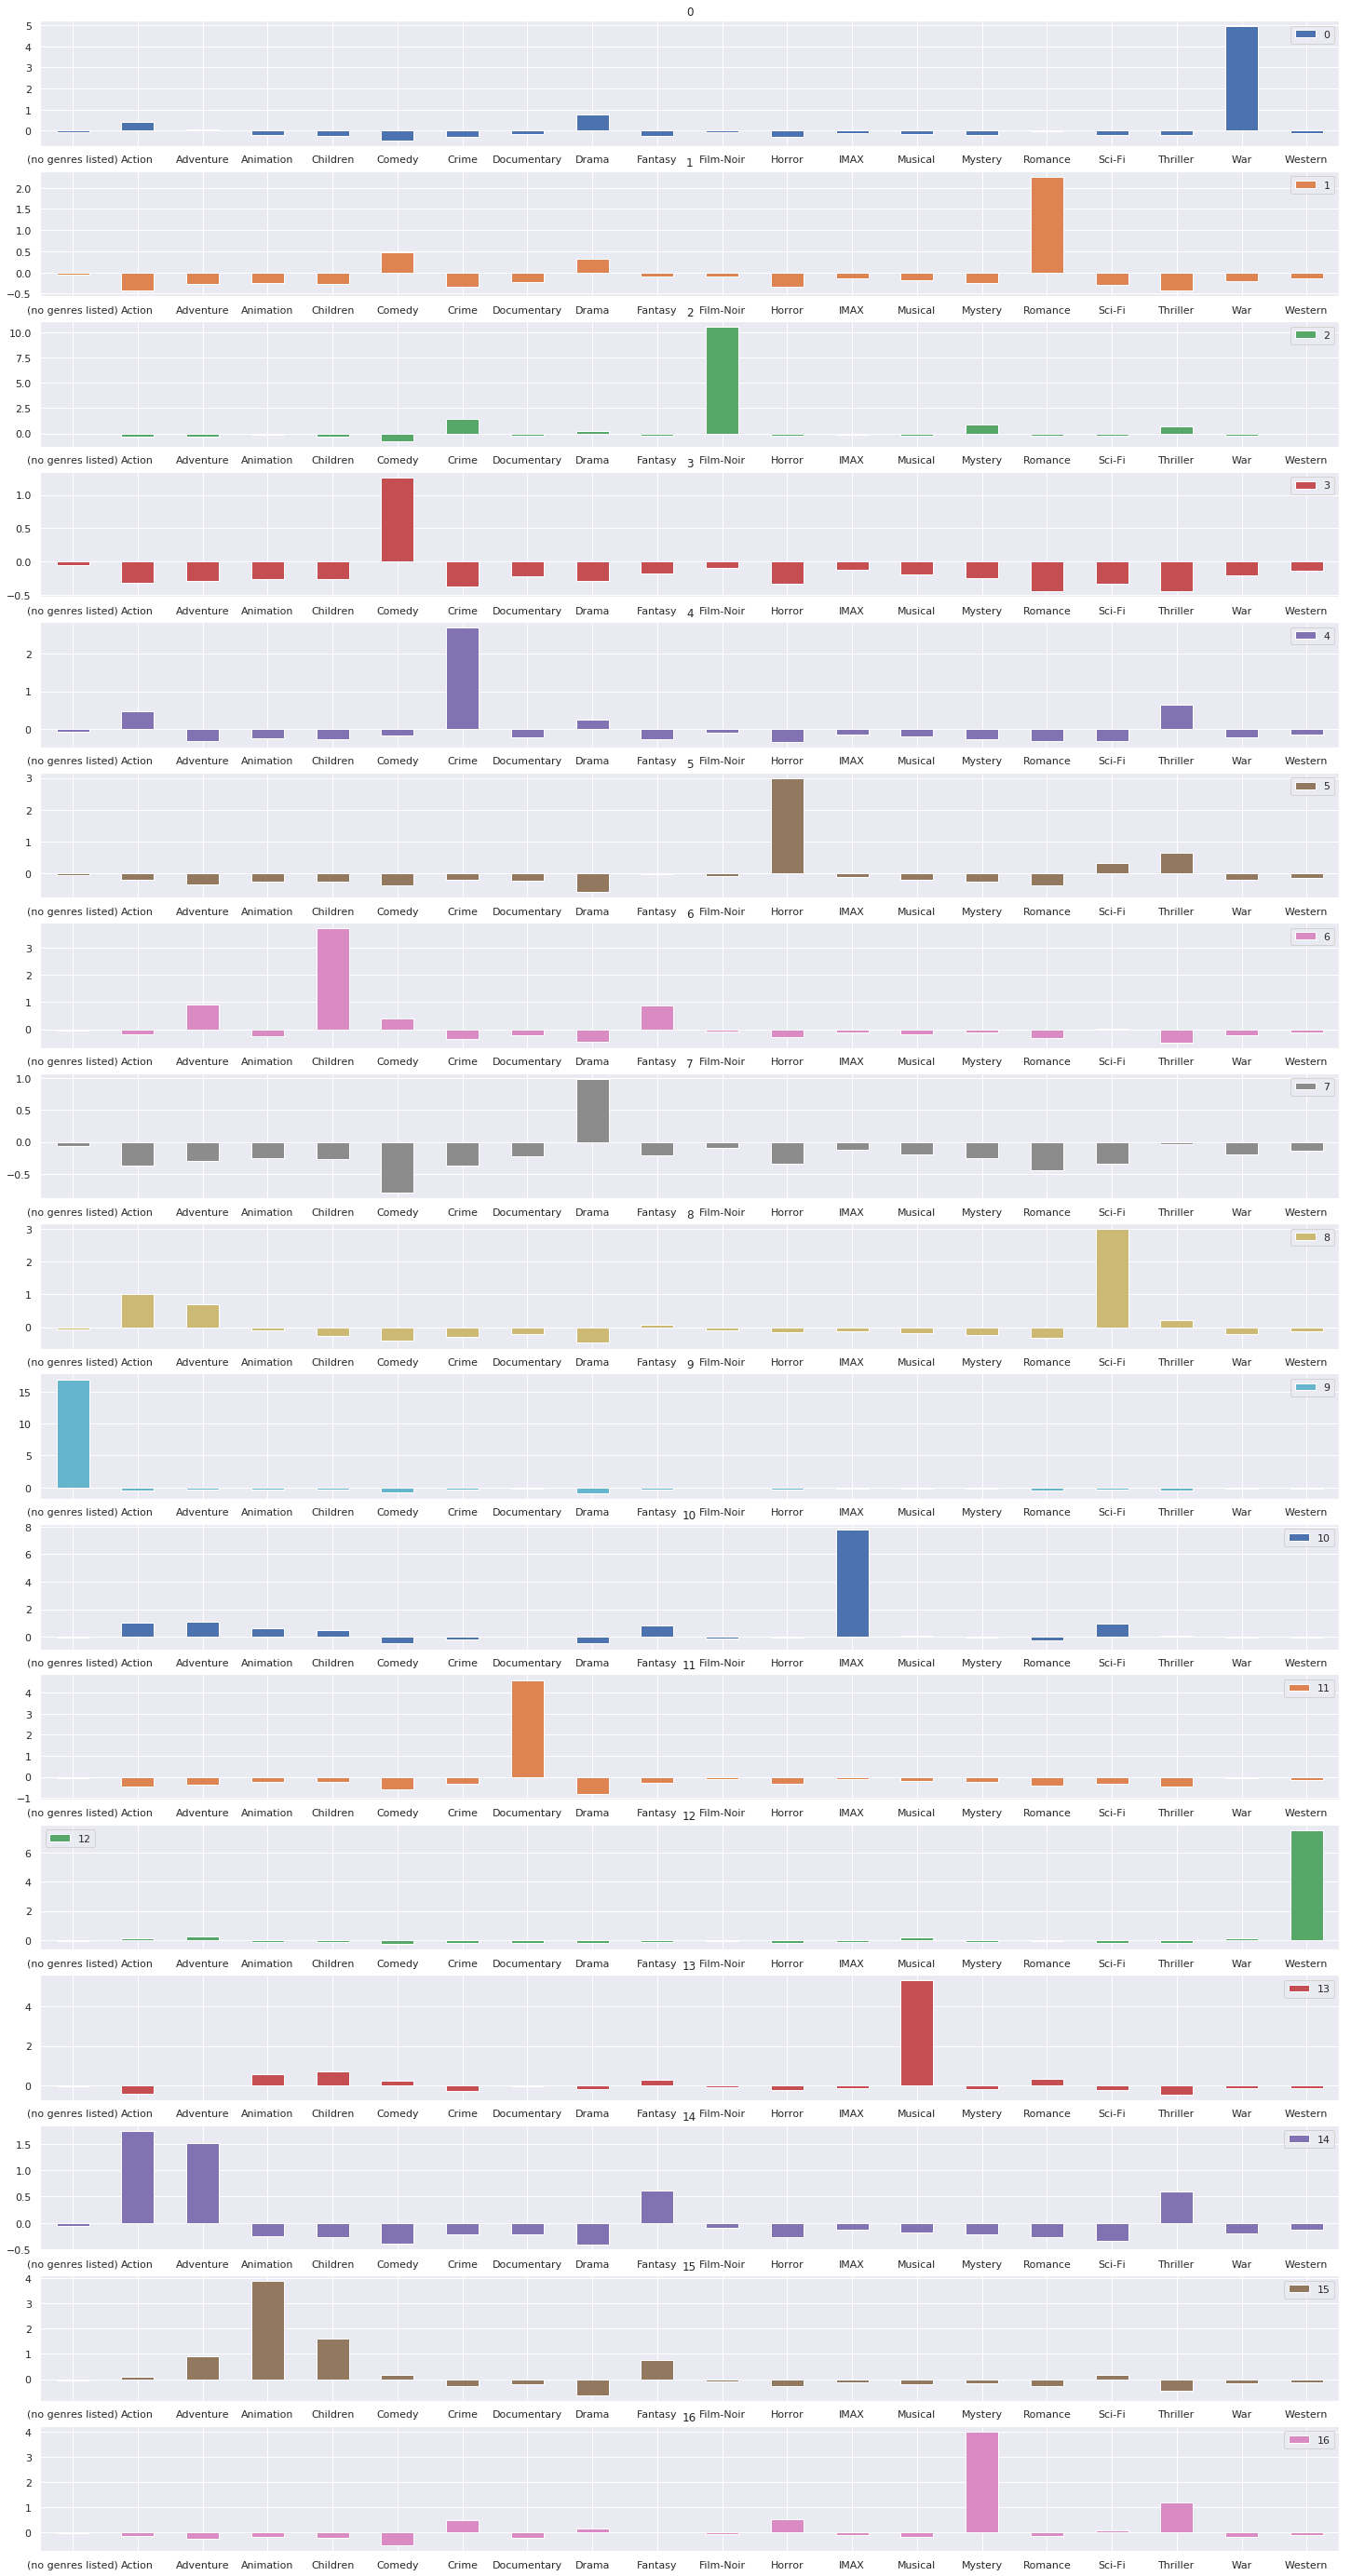

In [48]:
modelo = KMeans(n_clusters=17)
modelo.fit(generos_escalados)

grupos = pd.DataFrame(modelo.cluster_centers_,
            columns=generos.columns)

grupos.transpose().plot.bar(subplots=True, 
                            figsize=(25, 50), 
                            sharex=False, 
                            rot=0)

In [49]:
matriz_de_distancia = linkage(grupos)
matriz_de_distancia

array([[ 3.        ,  7.        ,  2.45819063,  2.        ],
       [ 1.        , 17.        ,  2.88322915,  3.        ],
       [14.        , 18.        ,  3.3263123 ,  4.        ],
       [ 4.        , 19.        ,  3.37958135,  5.        ],
       [ 8.        , 20.        ,  3.57138337,  6.        ],
       [ 5.        , 21.        ,  3.83595586,  7.        ],
       [ 6.        , 22.        ,  4.3864761 ,  8.        ],
       [15.        , 23.        ,  4.64180949,  9.        ],
       [16.        , 24.        ,  4.70526491, 10.        ],
       [11.        , 25.        ,  5.16508623, 11.        ],
       [ 0.        , 26.        ,  5.25519603, 12.        ],
       [13.        , 27.        ,  5.8172222 , 13.        ],
       [12.        , 28.        ,  7.87407943, 14.        ],
       [10.        , 29.        ,  8.18194308, 15.        ],
       [ 2.        , 30.        , 10.81216227, 16.        ],
       [ 9.        , 31.        , 17.06833057, 17.        ]])

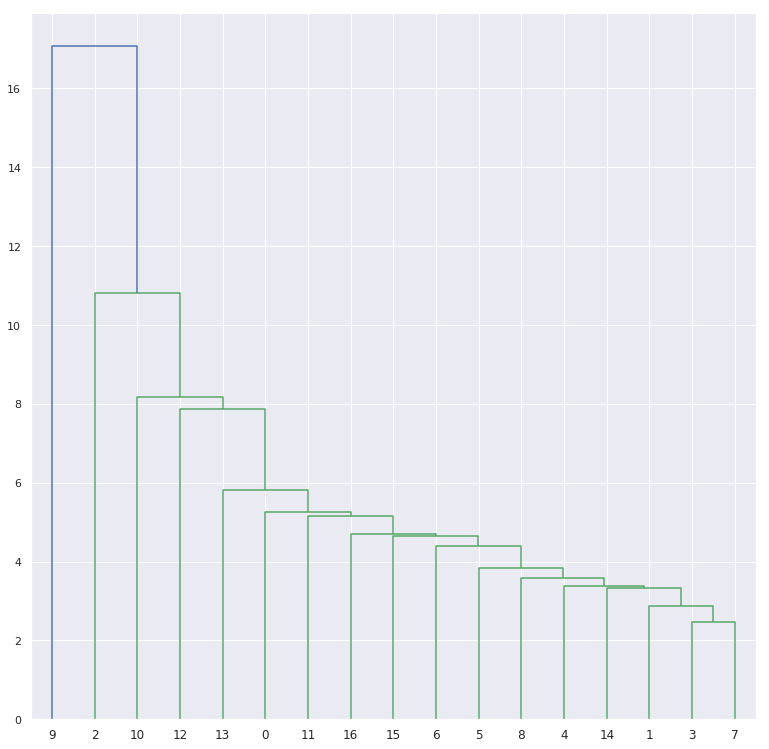

In [50]:
dendrograma = dendrogram(matriz_de_distancia)